In [9]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import noise
import numpy as np

In [10]:
coupling_map = [[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]]

In [11]:
noise_dict = {'errors': [{'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0004721766167523067, 0.0004721766167523067, 0.0004721766167523067, 0.9985834701497431], 'gate_qubits': [[0]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0005151090708174488, 0.0005151090708174488, 0.0005151090708174488, 0.9984546727875476], 'gate_qubits': [[1]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0005151090708174488, 0.0005151090708174488, 0.0005151090708174488, 0.9984546727875476], 'gate_qubits': [[2]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.000901556048412383, 0.000901556048412383, 0.000901556048412383, 0.9972953318547628], 'gate_qubits': [[3]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0011592423249461303, 0.0011592423249461303, 0.0011592423249461303, 0.9965222730251616], 'gate_qubits': [[4]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0009443532335046134, 0.0009443532335046134, 0.0009443532335046134, 0.9971669402994862], 'gate_qubits': [[0]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0010302181416348977, 0.0010302181416348977, 0.0010302181416348977, 0.9969093455750953], 'gate_qubits': [[1]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0010302181416348977, 0.0010302181416348977, 0.0010302181416348977, 0.9969093455750953], 'gate_qubits': [[2]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.001803112096824766, 0.001803112096824766, 0.001803112096824766, 0.9945906637095256], 'gate_qubits': [[3]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0023184846498922607, 0.0023184846498922607, 0.0023184846498922607, 0.9930445460503232], 'gate_qubits': [[4]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.9672573379090872], 'gate_qubits': [[1, 0]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.9699888805021712], 'gate_qubits': [[2, 0]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.9627184072576159], 'gate_qubits': [[2, 1]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.9437457618579164], 'gate_qubits': [[3, 2]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.9339816349935997], 'gate_qubits': [[3, 4]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.9307167621063416], 'gate_qubits': [[4, 2]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9372499999999999, 0.06275000000000008], [0.06275000000000008, 0.9372499999999999]], 'gate_qubits': [[0]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9345, 0.0655], [0.0655, 0.9345]], 'gate_qubits': [[1]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.97075, 0.029249999999999998], [0.029249999999999998, 0.97075]], 'gate_qubits': [[2]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9742500000000001, 0.02574999999999994], [0.02574999999999994, 0.9742500000000001]], 'gate_qubits': [[3]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.8747499999999999, 0.12525000000000008], [0.12525000000000008, 0.8747499999999999]], 'gate_qubits': [[4]]}], 'x90_gates': []}
noise_model = noise.noise_model.NoiseModel.from_dict( noise_dict )

In [12]:
qr = QuantumRegister(5, 'qr')
cr = ClassicalRegister(1, 'cr')
backend = Aer.get_backend('qasm_simulator')

In [25]:
def AND (input1,input2, q_1=0,q_2=1,q_out=2):
    # The keyword q_1 specifies the qubit used to encode input1
    # The keyword q_2 specifies    qubit used to encode input2
    # The keyword q_out specifies    qubit to be as output
    
    qc = QuantumCircuit(qr, cr)
    
    # prepare input on qubits q1 and q2
    if input1=='1':
        qc.x( qr[ q_1 ] )
    if input2=='1':
        qc.x( qr[ q_2 ] )
    
    qc.ccx(qr[ q_1 ],qr[ q_2 ],qr[ q_out ]) # the AND just needs a c
    qc.measure(qr[ q_out ],cr[0]) # output from qubit 1 is measured
    print("q_out = ", q_out)
    # the circuit is run on a simulator, but we do it so that the noise and connectivity of Tenerife are also reproduced 
    job = execute(qc, backend, shots=10000, noise_model=noise_model,
                                             coupling_map=coupling_map,
                                             basis_gates=noise_model.basis_gates)
    output = job.result().get_counts()
    
    return output

q_out =  2
{'1': 1022, '0': 8978}


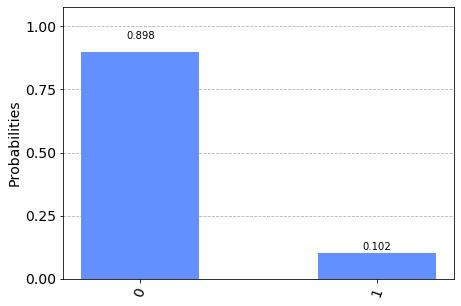

In [26]:
result = AND('0','0')
print( result )
plot_histogram( result )

In [27]:
worst = 1
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('\nProbability of correct answer for inputs',input1,input2)
        prob = AND(input1,input2, q_1=0,q_2=1,q_out=2)[str(int( input1=='1' and input2=='1' ))]/10000
        print( prob )
        worst = min(worst,prob)
print('\nThe lowest of these probabilities was',worst)


Probability of correct answer for inputs 0 0
q_out =  2
0.9005

Probability of correct answer for inputs 0 1
q_out =  2
0.901

Probability of correct answer for inputs 1 0
q_out =  2
0.9031

Probability of correct answer for inputs 1 1
q_out =  2
0.8916

The lowest of these probabilities was 0.8916


In [41]:
qr_better = QuantumRegister(5, 'qr')
cr_better = ClassicalRegister(1, 'cr')
backend = Aer.get_backend('qasm_simulator')

In [58]:
# Better AND gate
def better_AND (input1,input2, q_1=0,q_2=1,q_out=2):
    # The keyword q_1 specifies the qubit used to encode input1
    # The keyword q_2 specifies    qubit used to encode input2
    # The keyword q_out specifies    qubit to be as output
    
    qc = QuantumCircuit(qr_better, cr_better)
    
    # prepare input on qubits q1 and q2
#     if input1=='1':
#         qc.x( qr[ q_1 ] )
#     if input2=='1':
#         qc.x( qr[ q_2 ] )
    if (input1 == '1' ) & (input2 == '1'):
        qc.x(qr[q_out])
#     qc.x(q)
#     qc.x(qr[q_out])
#     qc.ccx(qr[ q_1 ],qr[ q_2 ],qr[ q_out ]) # the AND just needs a c
    
#     qc.measure(qr[ q_1],cr_better[0]) # output from qubit 1 is measured
    qc.measure(qr[ q_out ],cr_better[0]) # output from qubit 1 is measured
    
    # the circuit is run on a simulator, but we do it so that the noise and connectivity of Tenerife are also reproduced 
    job = execute(qc, backend, shots=10000, noise_model=noise_model,
                                             coupling_map=coupling_map,
                                             basis_gates=noise_model.basis_gates)
    output = job.result().get_counts()
    
    return output

{'1': 293, '0': 9707}


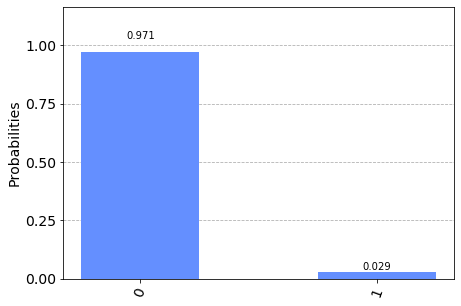

In [63]:
result = better_AND('0','0')
print( result )
plot_histogram( result )

In [64]:
worst = 1
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('\nProbability of correct answer for inputs',input1,input2)
        print('The correct answer should be: ', str(int( input1=='1' and input2=='1' )))
        prob = better_AND(input1,input2, q_1=0,q_2=1,q_out=2)[str(int( input1=='1' and input2=='1' ))]/10000
        print( prob )
        worst = min(worst,prob)
print('\nThe lowest of these probabilities was',worst)


Probability of correct answer for inputs 0 0
The correct answer should be:  0
0.9693

Probability of correct answer for inputs 0 1
The correct answer should be:  0
0.9721

Probability of correct answer for inputs 1 0
The correct answer should be:  0
0.9703

Probability of correct answer for inputs 1 1
The correct answer should be:  1
0.9703

The lowest of these probabilities was 0.9693
